In [ ]:
#!pip install yfinance

In [ ]:


import yfinance as yf

def get_stock_data(symbol, start_date, end_date, interval):
    data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return data

# Example usage
symbol = "TCS"  # Symbol for Nifty 50
start_date = "2020-01-01"
end_date = "2023-06-01"
interval = "1d"  # Use "5m" for 5 minutes, "1h" for 1 hour, "4h" for 4 hours, and "1d" for 1 day

stock_data = get_stock_data(symbol, start_date, end_date, interval)
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2020-01-02  4.29  4.37  4.17   4.27   3.991522  142800
2020-01-03  4.22  4.32  4.18   4.28   4.000870  141500
2020-01-06  4.23  4.46  4.20   4.45   4.159782  118500
2020-01-07  4.44  4.45  4.31   4.39   4.103695  104500
2020-01-08  4.36  4.45  4.33   4.34   4.056957  213400


In [ ]:
import pandas as pd

stock_data = get_stock_data(symbol, start_date, end_date, interval)

stockData = pd.DataFrame(stock_data)
stockData


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,4.29,4.37,4.17,4.27,3.991522,142800
2020-01-03,4.22,4.32,4.18,4.28,4.000870,141500
2020-01-06,4.23,4.46,4.20,4.45,4.159782,118500
2020-01-07,4.44,4.45,4.31,4.39,4.103695,104500
2020-01-08,4.36,4.45,4.33,4.34,4.056957,213400
...,...,...,...,...,...,...
2023-05-24,2.41,2.44,2.28,2.40,2.400000,762400
2023-05-25,2.35,2.38,2.25,2.28,2.280000,509500
2023-05-26,2.28,2.38,2.23,2.35,2.350000,437600


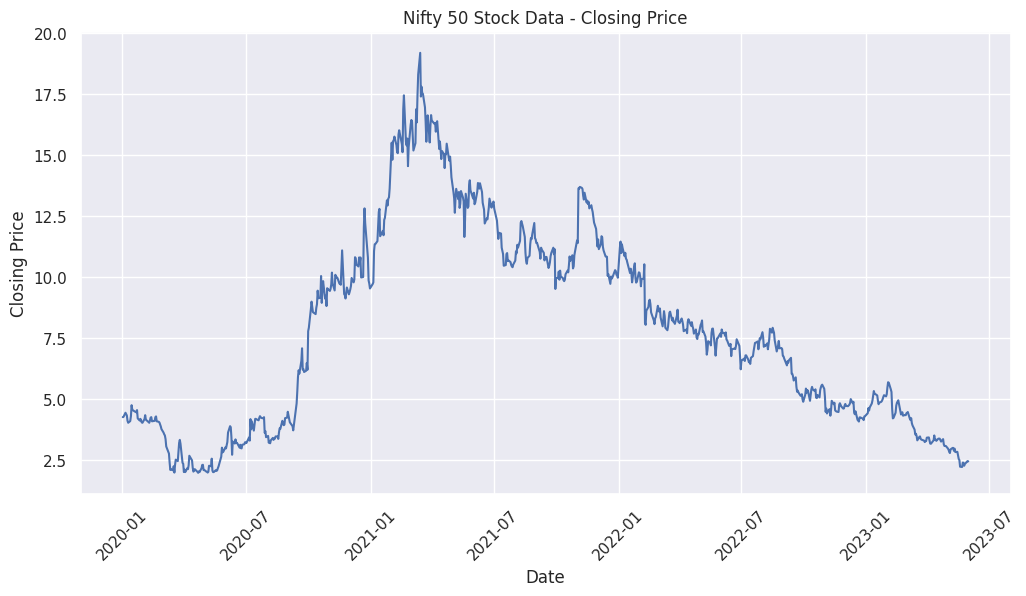

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # Set the plot style to darkgrid

plt.figure(figsize=(12, 6))  # Set the figure size

sns.lineplot(x=stockData.index, y=stockData['Close'])

plt.title("Nifty 50 Stock Data - Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


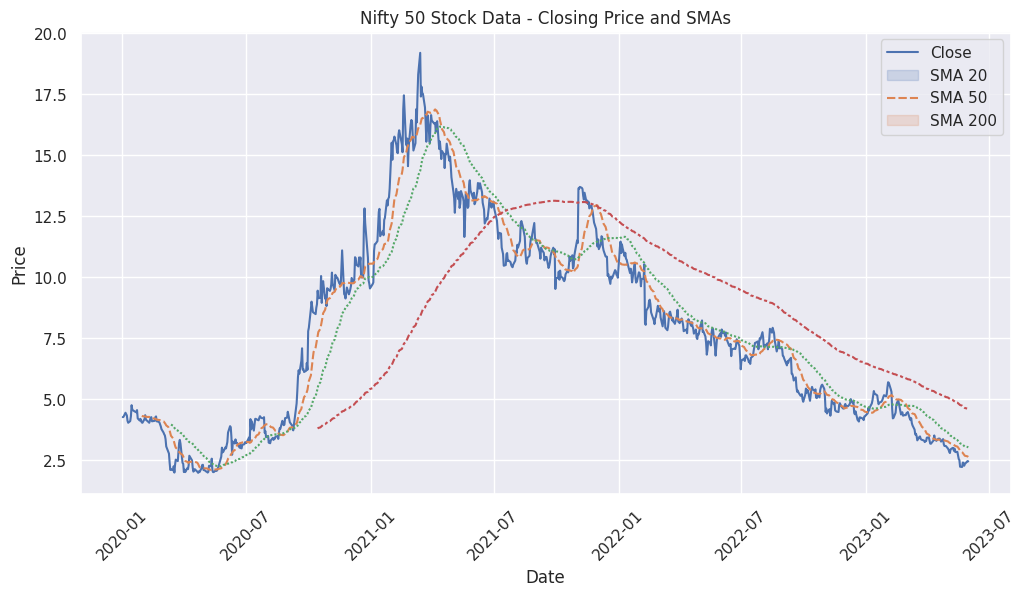

In [ ]:
# Calculate Simple Moving Average (SMA)
def calculate_sma(data, period):
    sma = data['Close'].rolling(window=period).mean()
    return sma

# Define the SMA periods
sma_periods = [20, 50, 200]

# Calculate SMAs for each period
for period in sma_periods:
    stockData['SMA_' + str(period)] = calculate_sma(stockData, period)

# Plotting the SMAs
plt.figure(figsize=(12, 6))
sns.lineplot(data=stockData[['Close', 'SMA_20', 'SMA_50', 'SMA_200']])
plt.title("Nifty 50 Stock Data - Closing Price and SMAs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(['Close', 'SMA 20', 'SMA 50', 'SMA 200'])
plt.show()


In [ ]:
def calculate_sma(data, period):
    sma = data['Close'].rolling(window=period).mean()
    return sma

sma_periods = [20, 50, 100]

for period in sma_periods:
    stockData['SMA_' + str(period)] = calculate_sma(stockData, period)

stockData.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_200,SMA_100
Date,,,,,,,,,,
2020-01-02,4.29,4.37,4.17,4.27,3.991522,142800,NaN,NaN,NaN,NaN
2020-01-03,4.22,4.32,4.18,4.28,4.000870,141500,NaN,NaN,NaN,NaN
2020-01-06,4.23,4.46,4.20,4.45,4.159782,118500,NaN,NaN,NaN,NaN
2020-01-07,4.44,4.45,4.31,4.39,4.103695,104500,NaN,NaN,NaN,NaN
2020-01-08,4.36,4.45,4.33,4.34,4.056957,213400,NaN,NaN,NaN,NaN


In [ ]:
def generate_signals(data):
    signals = []
    previous_signal = "Hold"
    for i in range(len(data)):
        if data['SMA_20'].iloc[i] > data['SMA_50'].iloc[i] and previous_signal != "Buy":
            signals.append("Buy")
            previous_signal = "Buy"
        elif data['SMA_20'].iloc[i] < data['SMA_50'].iloc[i] and previous_signal != "Sell":
            signals.append("Sell")
            previous_signal = "Sell"
        else:
            signals.append("Hold")
    return signals

# Generate signals based on SMAs
signals = generate_signals(stockData)




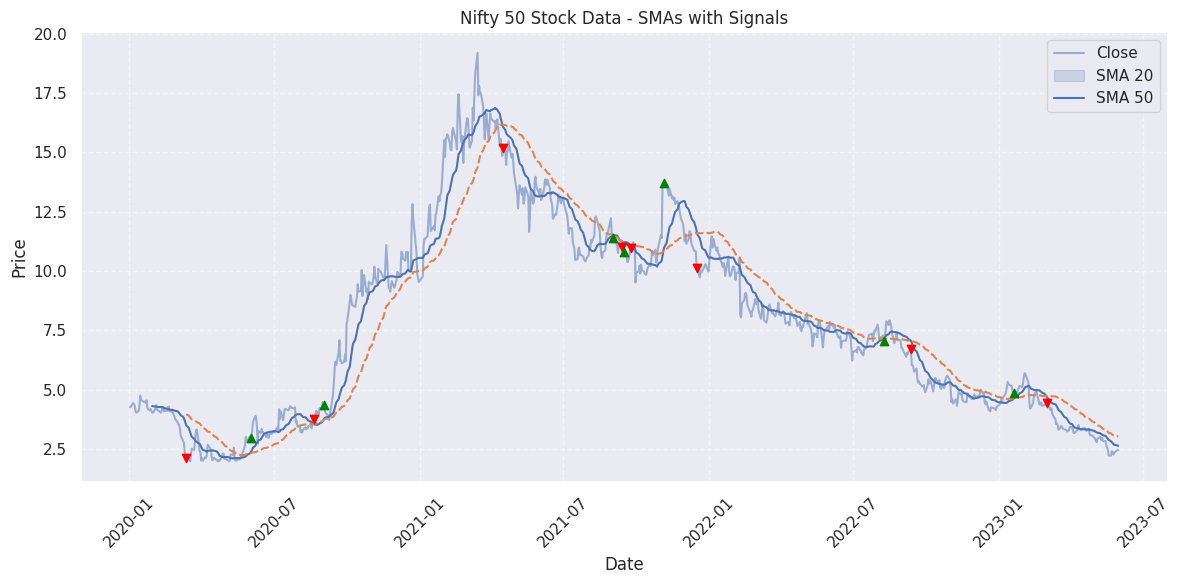

In [ ]:
# Plotting the SMAs and signals
plt.figure(figsize=(12, 6))

# Adjust transparency of the stock close price line
sns.lineplot(data=stockData[['Close']], alpha=0.5)

# Plot SMA 20 and SMA 50
sns.lineplot(data=stockData[['SMA_20', 'SMA_50']])

# Scatter plot for signals
for i in range(len(signals)):
    if signals[i] == "Buy":
        plt.scatter(stockData.index[i], stockData['Close'].iloc[i], color='green', marker='^', zorder=10)
    elif signals[i] == "Sell":
        plt.scatter(stockData.index[i], stockData['Close'].iloc[i], color='red', marker='v', zorder=10)

# Adjusting aesthetics
plt.title("Nifty 50 Stock Data - SMAs with Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(['Close', 'SMA 20', 'SMA 50'])
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Adjust layout for better spacing

plt.show()


In [ ]:
def backtest_strategy(data):
    capital = 100000  # Initial capital in your account
    position = "Hold"  # Current position: "Hold", "Buy", or "Sell"
    units_held = 0  # Number of units held

    # Initialize empty lists for storing data
    positions = []  # List to store positions over time
    pnl = []  # List to store the daily profit/loss
    units = []  # List to store the number of units held
    cumulative_returns = []  # List to store cumulative returns

    for i in range(len(data)):
        # Buy signal
        if data['SMA_20'].iloc[i] > data['SMA_50'].iloc[i] and position != "Buy":
            position = "Buy"
            buy_price = data['Close'].iloc[i]
            units_held = capital / buy_price
            pnl.append(0)
        # Sell signal
        elif data['SMA_20'].iloc[i] < data['SMA_50'].iloc[i] and position == "Buy":
            position = "Sell"
            sell_price = data['Close'].iloc[i]
            pnl_value = (sell_price - buy_price) * units_held
            pnl.append(pnl_value)
            capital += pnl_value
            units_held = 0
        # Hold position
        else:
            position = "Hold"
            pnl.append(0)

        # Store the position and units
        positions.append(position)
        units.append(units_held)

        # Calculate cumulative return as percentage
        # Consider the value of the held stocks (if any)
        current_value = capital + units_held * data['Close'].iloc[i]
        cumulative_returns.append((current_value - 100000) / 100000 * 100)

    return pd.DataFrame({'Position': positions,
                         'Profit/Loss': pnl,
                         'Units': units,
                         'Cumulative Returns': cumulative_returns})

# Now, backtest_strategy function should run on this cleaned data:
backtest_results = backtest_strategy(stockDataClean)



In [ ]:
# Display the backtest results
backtest_results

,Position,Profit/Loss,Units,Cumulative Returns
0,Hold,0.0,0.000000,0.000000
1,Hold,0.0,0.000000,0.000000
2,Hold,0.0,0.000000,0.000000
3,Hold,0.0,0.000000,0.000000
4,Hold,0.0,0.000000,0.000000
...,...,...,...,...
793,Buy,0.0,5.572892,104.203574
794,Hold,0.0,5.572892,105.196659
795,Buy,0.0,5.489742,104.203574
796,Hold,0.0,5.489742,104.396809


In [ ]:
backtest_results['Cumulative Returns'].unique()

array([  0.        , 100.        , 100.63298228, 100.43787545,
        99.88715662, 101.88030435, 102.56620973, 100.8262288 ,
       101.12722762,  98.81189677,  97.88308415,  98.40367206,
        99.66865433, 101.51362754, 101.5497692 ,  99.84086427,
        99.32004614, 101.24198173, 100.5273976 , 100.33445902,
       101.00600327, 100.32178891, 100.10229309, 101.50605913,
       101.27061569, 100.74421599,  99.44300743,  99.13543857,
        99.74148976, 101.86979322, 100.88725547, 100.50027053,
        99.87547265,  98.91995626, 101.22920579,  99.15676   ,
       100.83410065, 100.67423225, 100.76431957, 100.72667398,
        99.93454872, 100.18705203,  99.6523072 , 100.13276149,
       100.71459479,  99.23779727,  97.78877452,  99.80454129,
       102.26457885,  99.95413591, 101.50610927, 101.38264755,
       100.81566766, 100.14058854, 100.30625334, 100.70289494,
       100.20003285,  99.65487182,  98.63709267,  98.65593911,
        99.75666266, 101.23701902, 101.77855989, 101.61